In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime

In [52]:
obs_da = xr.open_dataset('sos_EB_01Nov2022to18June2023.nc')

summa_da = xr.open_dataset('template_output_tilden_1_5mswind_timestep.nc')
obs_da

<xarray.Dataset> Size: 6MB
Dimensions:         (time: 5520)
Coordinates:
  * time            (time) datetime64[ns] 44kB 2022-11-01 ... 2023-06-18T23:0...
Data variables: (12/259)
    P_10m_d         (time) float32 22kB ...
    Vtherm_ue       (time) float32 22kB ...
    tc_3m_uw        (time) float32 22kB ...
    spd_10m_d       (time) float32 22kB ...
    Tsoil_31_9cm_d  (time) float32 22kB ...
    tc_3m_c         (time) float32 22kB ...
    ...              ...
    Tsurf_rad_uw    (time) float32 22kB ...
    Tsurf_c         (time) float32 22kB ...
    Tsurf_d         (time) float32 22kB ...
    Tsurf_ue        (time) float32 22kB ...
    Tsurf_uw        (time) float32 22kB ...
    ro              (time) float32 22kB ...
Attributes:
    history:                   Created: 2022-11-01 00:05:06 +0000\n
    NIDAS_version:             v1.2-1671
    calibration_file_path:     /h/eol/isfs/isfs/projects/SOS/ISFS/cal_files/n...
    project_config:            /h/eol/isfs/isfs/projects/SOS/ISFS/config/sos....
    wind3d_horiz_coordinates:  geographic
    file_length_seconds:       86400
    wind3d_horiz_rotation:     1
    wind3d_tilt_correction:    0

In [53]:
summa_da = summa_da.sel(time=slice('2022-12-01', '2023-04-01'))
obs_da = obs_da.sel(time=slice('2022-12-01', '2023-04-01'))


In [54]:
obs_da_Tsurf= obs_da['Tsurf_d'].where((obs_da['Tsurf_d'] >= -40) & (obs_da['Tsurf_d'] <= 0), np.nan)


In [55]:
Tsfc_diff = summa_da['scalarSurfaceTemp'] - obs_da_Tsurf - 273.15

(-40.0, 5.0)

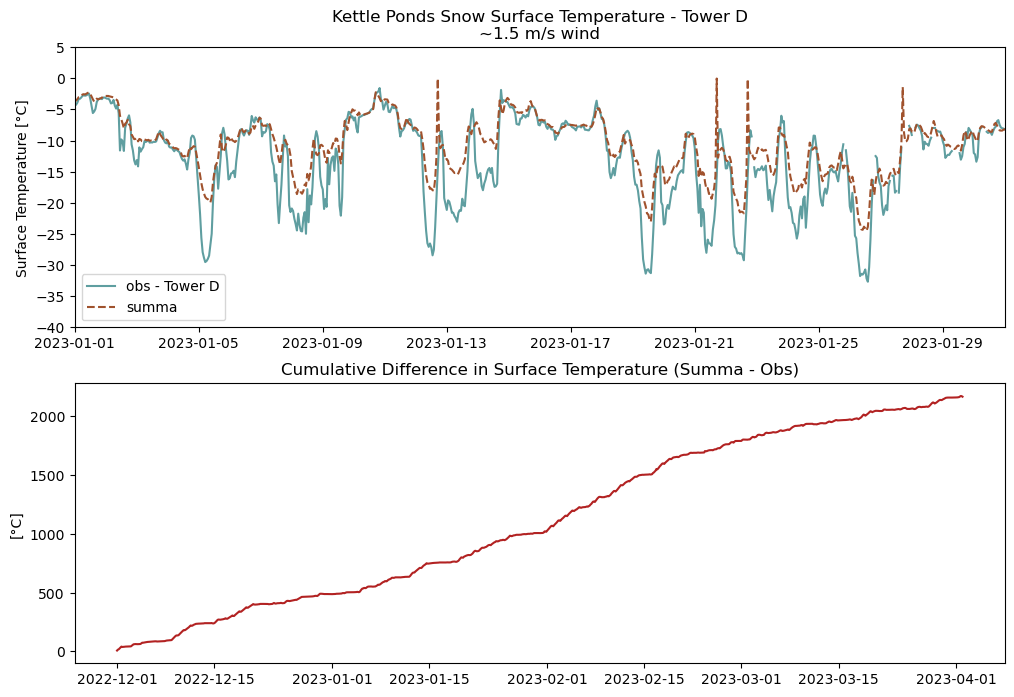

In [61]:
fig, ax = plt.subplots(2,1,figsize=(12, 8))

ax[0].plot(obs_da_Tsurf['time'], obs_da_Tsurf, color='cadetblue', label='obs - Tower D')
ax[0].plot(summa_da['time'], summa_da['scalarSurfaceTemp']-273.15, linestyle='--', color='sienna', label='summa')
ax[0].legend()
ax[0].set_ylabel('Surface Temperature [°C]')
ax[0].set_title('Kettle Ponds Snow Surface Temperature - Tower D\n~1.5 m/s wind')
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 1, 31)
ax[0].set_xlim(start_date, end_date)


ax[1].plot(Tsfc_diff.time, Tsfc_diff.cumsum(), color='firebrick')
# ax[1].plot(obs_da['time'], obs_da['T_3m_c'], color='firebrick')
ax[1].set_ylabel('[°C]')
ax[1].set_title('Cumulative Difference in Surface Temperature (Summa - Obs)')
# ax[1].set_xlim(start_date, end_date)

ax[0].set_ylim(-40,5)

In [43]:
# Create a mask where both DataArrays have values
mask = obs_da['w_h2o__3m_ue'].notnull() & summa_da['scalarLatHeatTotal'].notnull()

# Apply the mask to both DataArrays and subtract
latent_diff = (obs_da['w_h2o__3m_ue'].where(mask) * 1000) - summa_da['scalarLatHeatTotal'].where(mask)


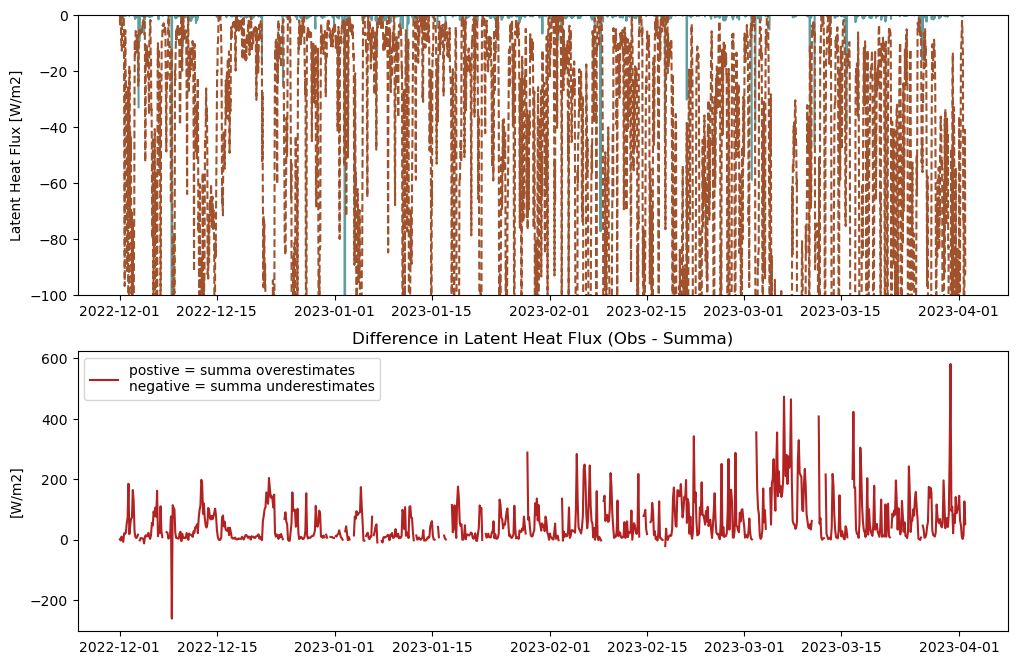

In [44]:
# Plot sensible heat flux

fig, ax = plt.subplots(2,1,figsize=(12, 8))

ax[0].plot(obs_da['time'], obs_da['w_h2o__3m_ue']*1000, color='cadetblue', label='obs')
ax[0].plot(summa_da['time'], summa_da['scalarLatHeatTotal'], linestyle='--', color='sienna', label='summa')
ax[0].set_ylim(-100,0)
ax[0].set_ylabel('Latent Heat Flux [W/m2]')

ax[1].plot(latent_diff.time, latent_diff, color='firebrick', label='postive = summa overestimates\nnegative = summa underestimates')
ax[1].set_ylabel('[W/m2]')
ax[1].set_title('Difference in Latent Heat Flux (Obs - Summa)')
ax[1].legend()